# Conduct Statistical Test & Exploring the Data

### Import necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(0)

In [2]:
#set the display option so that we can see all the columns when looking at dataframe
pd.set_option('display.max_columns', None)

In [3]:
#go to BIG5 folder and list the directories in the folder
os.chdir('BIG5')
os.listdir()

['.ipynb_checkpoints',
 'big5data.csv',
 'Book1.twb',
 'codebook.txt',
 'data.csv',
 'df_cleaned.csv',
 'df_cleaned.hyper',
 'Untitled.ipynb']

In [4]:
#cleaned dataframe with outliers removed, etc.
df= pd.read_csv("df_cleaned.csv")

In [5]:
df.shape

(19351, 65)

In [6]:
df.head()

,race_x,age,engnat,gender,hand,source,country,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,Extroversion,Agreeableness,Conscientiousness,Neuroticism,Open2Experience,race_y,age_bin,fromUS
0,3.0,53.0,True,Male,Right,AnotherPageFromTestPage,US,4,2,5,2,5,1,4,3,5,1,1,5,2,5,1,1,1,1,1,1,1,5,1,5,2,3,1,5,4,5,4,1,5,1,5,1,4,1,4,5,4,1,3,1,5,1,4,2,5,5,34,36,37,39,33,European,oa(40+),True
1,13.0,46.0,True,Female,Right,AnotherPageFromTestPage,US,2,2,3,3,3,3,1,5,1,5,2,3,4,2,3,4,3,2,2,4,1,3,3,4,4,4,2,3,4,3,4,1,3,2,3,1,5,1,4,4,3,3,3,3,2,3,3,1,3,2,12,25,32,19,16,Other,oa(40+),True
2,1.0,14.0,False,Female,Right,AnotherPageFromTestPage,PK,5,1,1,4,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,5,1,5,5,1,5,1,5,5,5,4,1,5,1,5,1,5,1,5,5,4,5,5,1,5,1,5,5,5,5,25,28,39,4,35,Mixed Race,minor(<18),False
3,3.0,19.0,False,Female,Right,AnotherPageFromTestPage,RO,2,5,2,4,3,4,3,4,4,5,5,4,4,2,4,5,5,5,4,5,2,5,4,4,3,5,3,4,4,3,3,3,4,5,1,4,5,4,2,3,4,3,5,2,4,2,5,2,5,5,12,27,16,7,31,European,ya(18-24),False
4,11.0,25.0,False,Female,Right,Google,US,3,1,3,3,3,1,3,1,3,5,3,3,3,4,3,3,3,3,3,4,5,5,3,5,1,5,1,5,5,5,3,1,5,3,3,1,1,3,3,3,3,1,1,1,3,1,3,1,5,3,24,34,24,20,24,Asian,ya(18-24),True


In [7]:
#variable to store big5personality trait names
big5traits= df.iloc[:,-8:-3].columns
print(big5traits)

Index(['Extroversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism',
       'Open2Experience'],
      dtype='object')


# Does age affect personality?

## Statistical testing: Parametric or Non-Parametric?

* See what tests can be used parametric or non- parametric?

In [8]:
#pivot original dataframe with age as columns and the values being the big5traits
big5_age = df.pivot(values = big5traits,columns='age_bin')

## Checking Assumptions for normality
* Visualize the data through histogram
* Use a qq plot to see if data is normal
* Normality Assumption is violated
* A non-parametric test must be used

In [9]:
#import qqplot to see if the data is normally distributed
from statsmodels.graphics.gofplots import qqplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200725346D8>,
      dtype=object)

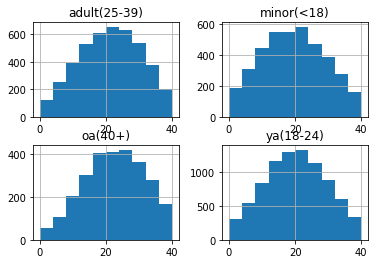

In [10]:
#visualize the data through histogram
#looks normal but slightly off, thin tails. More data located in the extremes than a normal one.
big5_age['Extroversion'].hist()

In [11]:
big5_age['Extroversion'].columns

Index(['adult(25-39)', 'minor(<18)', 'oa(40+)', 'ya(18-24)'], dtype='object', name='age_bin')

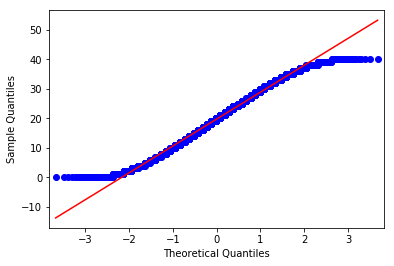

In [12]:
qqplot(big5_age['Extroversion']['ya(18-24)'].dropna(),line='s');

In [13]:
from sklearn.preprocessing import power_transform
big5_age.iloc[:,:]= power_transform(big5_age, method= 'yeo-johnson')

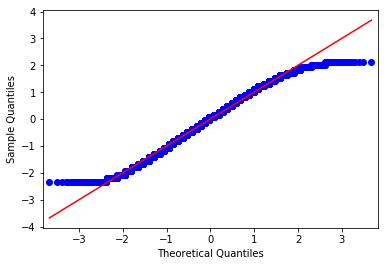

In [14]:
qqplot(big5_age['Extroversion']['ya(18-24)'].dropna(),line='s');

# Non - Parametric Test
* Conducting Kruskal - Wallis for categorical independent and continuous dependent
* IV: age ( binned) DV: different personalities


* Conducting Spearman's correlation coefficient
* IV: age (continuous) DV: different personalities

### The Kruskal-Wallis H-test 

**Null hypothesis: population median of all of the groups are equal.**
* For age as a independent variable, all emotions do not reject the null hypothesis
* The population median for all groups are equal 
* age does not have an affect on personality

In [24]:
from scipy.stats import kruskal

In [29]:
#return list of the values of a pivoted dataframe with the null values dropped
def test_inputs(dataframe):
    col = []
    for v in dataframe.columns:
        col.append(dataframe[v].dropna())
    return col

In [30]:
kruskal_race_inputs = test_inputs(big5_age)

In [18]:
#save the values to use for the kruskal function
#the age independent variable has 4 categories. Each emotion(dependent variable) has 4 categories and its respective values
#use the kruskal function to get the stat and p value
age_Extroversion = kruskal_race_inputs[0:4]
age_Agreeableness = kruskal_race_inputs[4:8]
age_Conscientiousness = kruskal_race_inputs[8:12]
age_Neuroticism = kruskal_race_inputs[12:16]
age_Open2Experience = kruskal_race_inputs[16:20]

In [19]:
age_Emotions = [age_Extroversion,age_Agreeableness,age_Conscientiousness,age_Neuroticism,age_Open2Experience]
for emotions in age_Emotions:
    print(kruskal(*emotions))

KruskalResult(statistic=0.5302271494403866, pvalue=0.9122021872216677)
KruskalResult(statistic=0.7033022906303688, pvalue=0.8724269434161755)
KruskalResult(statistic=2.333199277065723, pvalue=0.5061906590878511)
KruskalResult(statistic=0.6542088781149311, pvalue=0.883917873685482)
KruskalResult(statistic=0.8017139375186264, pvalue=0.8490570383457074)


## Spearman's Correlation Coefficient
**Check to see if continuous variables are correlated**
* There is a weak correlation between age and personalities
* Age has the strongest correlation with conscientiousness, but still weak at .23

In [20]:
df.head()

,race_x,age,engnat,gender,hand,source,country,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,Extroversion,Agreeableness,Conscientiousness,Neuroticism,Open2Experience,race_y,age_bin,fromUS
0,3.0,53.0,True,Male,Right,AnotherPageFromTestPage,US,4,2,5,2,5,1,4,3,5,1,1,5,2,5,1,1,1,1,1,1,1,5,1,5,2,3,1,5,4,5,4,1,5,1,5,1,4,1,4,5,4,1,3,1,5,1,4,2,5,5,34,36,37,39,33,European,oa(40+),True
1,13.0,46.0,True,Female,Right,AnotherPageFromTestPage,US,2,2,3,3,3,3,1,5,1,5,2,3,4,2,3,4,3,2,2,4,1,3,3,4,4,4,2,3,4,3,4,1,3,2,3,1,5,1,4,4,3,3,3,3,2,3,3,1,3,2,12,25,32,19,16,Other,oa(40+),True
2,1.0,14.0,False,Female,Right,AnotherPageFromTestPage,PK,5,1,1,4,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,5,1,5,5,1,5,1,5,5,5,4,1,5,1,5,1,5,1,5,5,4,5,5,1,5,1,5,5,5,5,25,28,39,4,35,Mixed Race,minor(<18),False
3,3.0,19.0,False,Female,Right,AnotherPageFromTestPage,RO,2,5,2,4,3,4,3,4,4,5,5,4,4,2,4,5,5,5,4,5,2,5,4,4,3,5,3,4,4,3,3,3,4,5,1,4,5,4,2,3,4,3,5,2,4,2,5,2,5,5,12,27,16,7,31,European,ya(18-24),False
4,11.0,25.0,False,Female,Right,Google,US,3,1,3,3,3,1,3,1,3,5,3,3,3,4,3,3,3,3,3,4,5,5,3,5,1,5,1,5,5,5,3,1,5,3,3,1,1,3,3,3,3,1,1,1,3,1,3,1,5,3,24,34,24,20,24,Asian,ya(18-24),True


In [21]:
corr =df[big5traits].join(df['age']).corr(method = 'spearman')

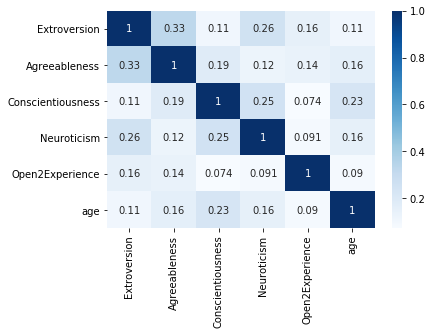

In [22]:
sns.heatmap(corr,cmap ='Blues',annot=True);

## Visualization

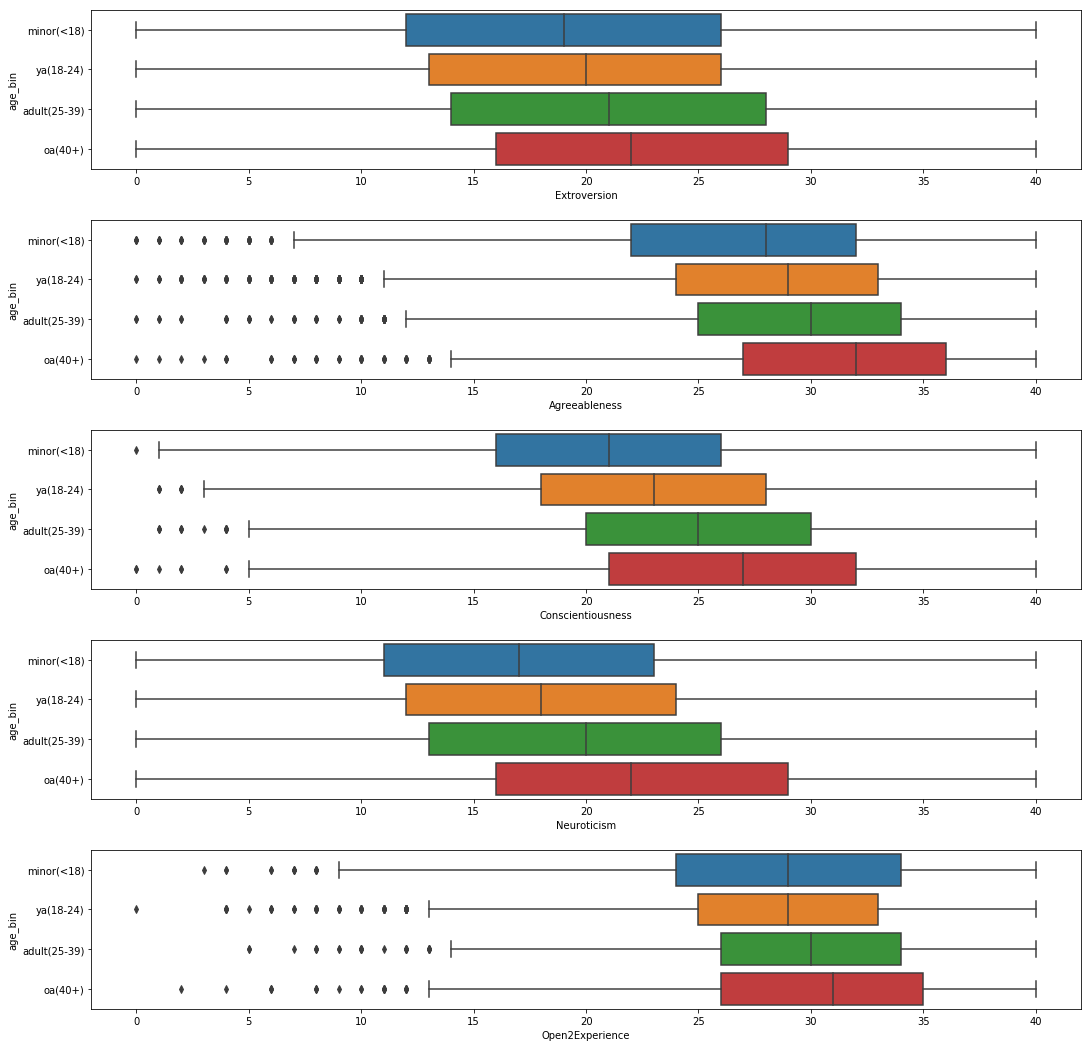

In [23]:
fig, axes = plt.subplots(5, figsize=(15,15))
axes = axes.flatten()
fig.tight_layout(pad=3.0)
i=0
for t in big5traits:
    ax = sns.boxplot(y='age_bin',x=t,data=df, order =['minor(<18)','ya(18-24)','adult(25-39)','oa(40+)'],ax=axes[i])
    i += 1

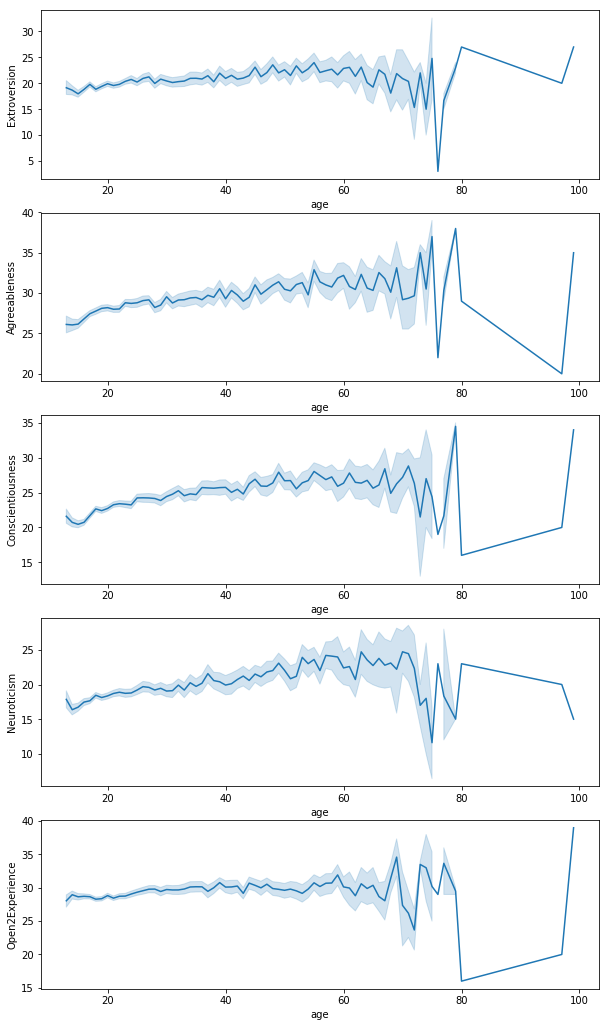

In [ ]:
fig, axes = plt.subplots(5, figsize=(10,18))
axes = axes.flatten()
i=0
for t in big5traits:
    ax = sns.lineplot(x='age',y=t,data=df,ax=axes[i])
    i += 1

# Is there a difference between the USA and the Rest?

### Checking Assumptions for Tests.
* A non parametric test should be used since normality of data is violated

In [14]:
big5_USA = df.pivot(values = big5traits, columns = 'fromUS')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020075FB9160>,
      dtype=object)

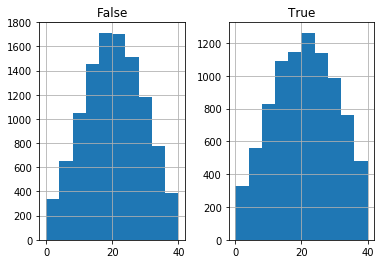

In [17]:
big5_USA['Extroversion'].hist()

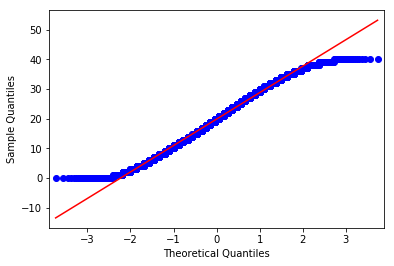

In [20]:
qqplot(big5_USA['Extroversion'][0].dropna(),line='s');

### Mann-Whitney U Test
* Non Parametric unPaired T-test Alternative
* If rejected, the distribution for each group are not equal

In [55]:
from scipy.stats import mannwhitneyu

In [45]:
big5_USA.head()

Extroversion       Agreeableness       Conscientiousness        \
fromUS        False True          False True              False True    
0               NaN  34.0           NaN  36.0               NaN  37.0   
1               NaN  12.0           NaN  25.0               NaN  32.0   
2              25.0   NaN          28.0   NaN              39.0   NaN   
3              12.0   NaN          27.0   NaN              16.0   NaN   
4               NaN  24.0           NaN  34.0               NaN  24.0   

       Neuroticism       Open2Experience        
fromUS       False True            False True   
0              NaN  39.0             NaN  33.0  
1              NaN  19.0             NaN  16.0  
2              4.0   NaN            35.0   NaN  
3              7.0   NaN            31.0   NaN  
4              NaN  20.0             NaN  24.0

In [32]:
#drop the null values from the pivoted (big5_USA) and returns list
ranksums_inputs = test_inputs(big5_USA)

In [40]:
big5traits

Index(['Extroversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism',
       'Open2Experience'],
      dtype='object')

In [43]:
usa_Extroversion = ranksums_inputs[0:2]
usa_Agreeableness = ranksums_inputs[2:4]
usa_Conscientiousness = ranksums_inputs[4:6]
usa_Neuroticism = ranksums_inputs[6:8]
usa_Open2Experience = ranksums_inputs[8:10]

In [56]:
usa_Emotions = [usa_Extroversion,usa_Agreeableness,usa_Conscientiousness,usa_Neuroticism,usa_Open2Experience]
for emotions in usa_Emotions:
    print(mannwhitneyu(*emotions))

MannwhitneyuResult(statistic=44753597.5, pvalue=8.895596261785486e-05)
MannwhitneyuResult(statistic=40869091.0, pvalue=9.169508717821433e-44)
MannwhitneyuResult(statistic=41438557.5, pvalue=2.6100889117150396e-35)
MannwhitneyuResult(statistic=42783714.5, pvalue=4.196078925028747e-19)
MannwhitneyuResult(statistic=43012833.0, pvalue=6.944228123169958e-17)


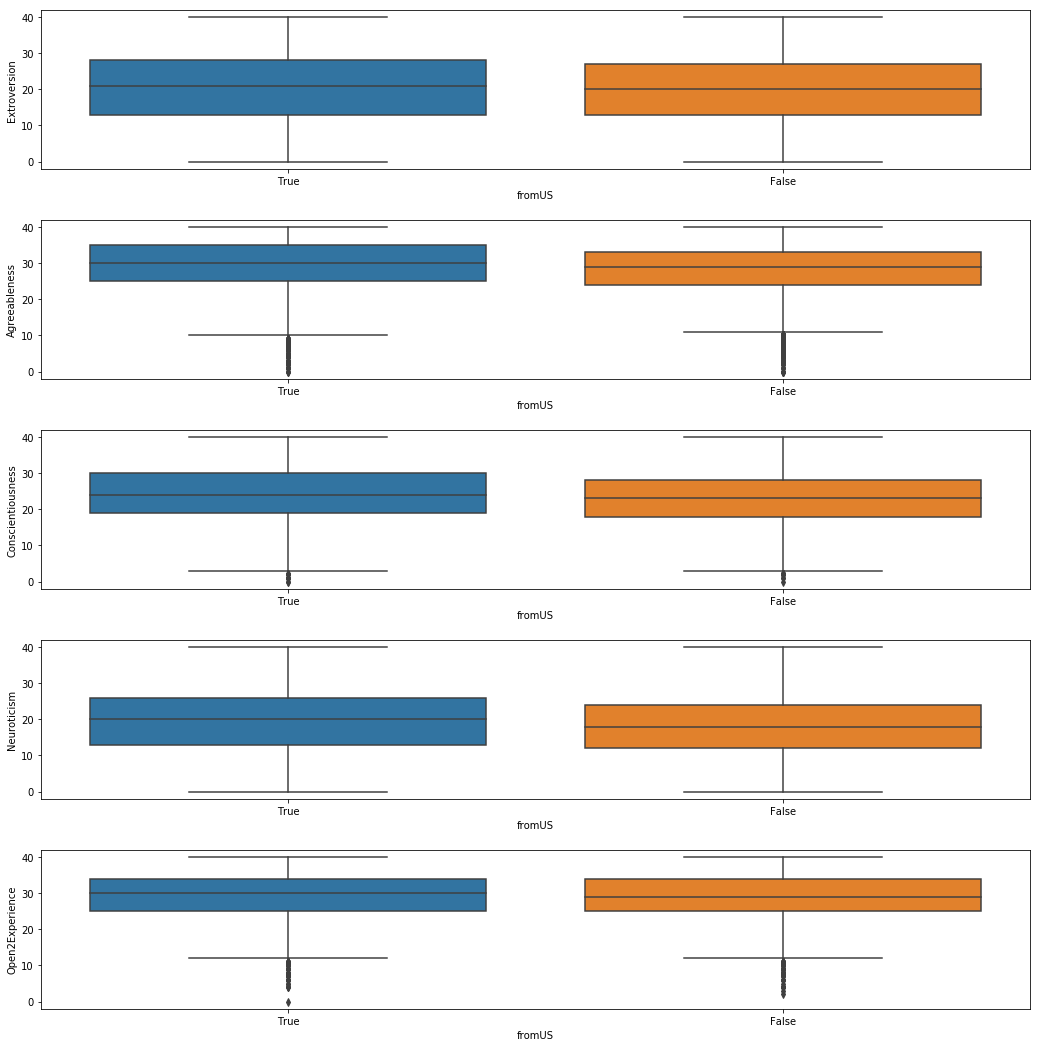

In [53]:
fig, axes = plt.subplots(5, figsize=(15,15))
axes = axes.flatten()
fig.tight_layout(pad=3.0)
i=0
for t in big5traits:
    ax = sns.boxplot(x='fromUS',y=t,data=df, order =[True,False],ax=axes[i])
    i += 1

# Unsupervised Learning to see patterns in data

## Preprocessing 

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
ocean = ['O','C','E','A','N']
num_columns = []
for e in ocean:
    for i in range(0,10):
        num_columns.append(e+ str(i+1))

In [10]:
cat_columns = df[['engnat','gender','hand']]

In [31]:
num_columns = df[num_columns]

In [11]:
#fit and transform using onehotencoder
encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(cat_columns)

In [12]:
#turn encoded into dataframe
cat_encoded_cols = pd.DataFrame(encoded)

In [13]:
#get featurenames and rename column names
cat_encoded_cols.columns =  encoder.get_feature_names()

In [14]:
#create new df by concatting old and encoded df
encoded_df = pd.concat([num_columns,cat_encoded_cols],axis=1)

In [15]:
encoded_df.head()

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,x0_False,x0_True,x1_Female,x1_Male,x1_Other,x2_Both,x2_Left,x2_Right
0,4,1,3,1,5,1,4,2,5,5,4,1,5,1,5,1,4,1,4,5,4,2,5,2,5,1,4,3,5,1,1,5,1,5,2,3,1,5,4,5,1,5,2,5,1,1,1,1,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3,3,3,3,2,3,3,1,3,2,4,1,3,2,3,1,5,1,4,4,2,2,3,3,3,3,1,5,1,5,1,3,3,4,4,4,2,3,4,3,2,3,4,2,3,4,3,2,2,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,4,5,5,1,5,1,5,5,5,5,4,1,5,1,5,1,5,1,5,5,5,1,1,4,5,1,1,5,5,1,5,1,5,5,1,5,1,5,5,5,5,1,5,5,5,5,5,5,5,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,3,5,2,4,2,5,2,5,5,3,3,4,5,1,4,5,4,2,3,2,5,2,4,3,4,3,4,4,5,2,5,4,4,3,5,3,4,4,3,5,4,4,2,4,5,5,5,4,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3,1,1,1,3,1,3,1,5,3,3,1,5,3,3,1,1,3,3,3,3,1,3,3,3,1,3,1,3,5,5,5,3,5,1,5,1,5,5,5,3,3,3,4,3,3,3,3,3,4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
fitted_encoded_df = scaler.fit_transform(encoded_df)
encoded_df = pd.DataFrame(fitted_encoded_df, columns=encoded_df.columns)

C:\Users\jshyo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
encoded_df.head()

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,x0_False,x0_True,x1_Female,x1_Male,x1_Other,x2_Both,x2_Left,x2_Right
0,0.75,0.0,0.5,0.00,1.00,0.00,0.75,0.25,1.0,1.00,0.75,0.0,1.00,0.00,1.0,0.00,0.75,0.00,0.75,1.00,0.75,0.25,1.00,0.25,1.0,0.00,0.75,0.50,1.00,0.0,0.00,1.0,0.00,1.00,0.25,0.50,0.00,1.00,0.75,1.0,0.00,1.00,0.25,1.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.50,0.5,0.5,0.50,0.25,0.50,0.50,0.00,0.5,0.25,0.75,0.0,0.50,0.25,0.5,0.00,1.00,0.00,0.75,0.75,0.25,0.25,0.50,0.50,0.5,0.50,0.00,1.00,0.00,1.0,0.00,0.5,0.50,0.75,0.75,0.75,0.25,0.50,0.75,0.5,0.25,0.50,0.75,0.25,0.50,0.75,0.5,0.25,0.25,0.75,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.75,1.0,1.0,0.00,1.00,0.00,1.00,1.00,1.0,1.00,0.75,0.0,1.00,0.00,1.0,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.75,1.0,0.00,0.00,1.00,1.00,0.0,1.00,0.0,1.00,1.00,0.00,1.00,0.00,1.00,1.00,1.0,1.00,0.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.75,0.5,1.0,0.25,0.75,0.25,1.00,0.25,1.0,1.00,0.50,0.5,0.75,1.00,0.0,0.75,1.00,0.75,0.25,0.50,0.25,1.00,0.25,0.75,0.5,0.75,0.50,0.75,0.75,1.0,0.25,1.0,0.75,0.75,0.50,1.00,0.50,0.75,0.75,0.5,1.00,0.75,0.75,0.25,0.75,1.00,1.0,1.00,0.75,1.00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.50,0.0,0.0,0.00,0.50,0.00,0.50,0.00,1.0,0.50,0.50,0.0,1.00,0.50,0.5,0.00,0.00,0.50,0.50,0.50,0.50,0.00,0.50,0.50,0.5,0.00,0.50,0.00,0.50,1.0,1.00,1.0,0.50,1.00,0.00,1.00,0.00,1.00,1.00,1.0,0.50,0.50,0.50,0.75,0.50,0.50,0.5,0.50,0.50,0.75,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Clustering the encoded_df

In [18]:
## Elbow Method

In [19]:
from sklearn.mixture import GaussianMixture

In [20]:
n_components = np.arange(1, 15)
models = [GaussianMixture(n, covariance_type='full').fit(encoded_df)
          for n in n_components]


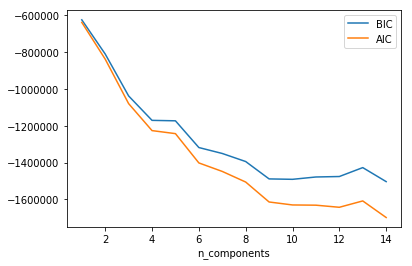

In [21]:
plt.plot(n_components, [m.bic(encoded_df) for m in models], label='BIC')
plt.plot(n_components, [m.aic(encoded_df) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [23]:
#9 components according to eblow method
gmm = GaussianMixture(n_components=9)
labels = gmm.fit_predict(encoded_df)

In [24]:
labels

array([6, 0, 3, ..., 1, 6, 6], dtype=int64)

In [25]:
np.unique(labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 array([6527, 3106,  155, 3925,  786,  176, 4180,   80,  416], dtype=int64))

In [37]:
df2 = pd.concat([num_columns,cat_columns],axis=1)

In [38]:
df2['labels'] = labels

In [39]:
df2.head()

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,engnat,gender,hand,labels
0,4,1,3,1,5,1,4,2,5,5,4,1,5,1,5,1,4,1,4,5,4,2,5,2,5,1,4,3,5,1,1,5,1,5,2,3,1,5,4,5,1,5,2,5,1,1,1,1,1,1,True,Male,Right,6
1,3,3,3,3,2,3,3,1,3,2,4,1,3,2,3,1,5,1,4,4,2,2,3,3,3,3,1,5,1,5,1,3,3,4,4,4,2,3,4,3,2,3,4,2,3,4,3,2,2,4,True,Female,Right,0
2,4,5,5,1,5,1,5,5,5,5,4,1,5,1,5,1,5,1,5,5,5,1,1,4,5,1,1,5,5,1,5,1,5,5,1,5,1,5,5,5,5,1,5,5,5,5,5,5,5,5,False,Female,Right,3
3,4,3,5,2,4,2,5,2,5,5,3,3,4,5,1,4,5,4,2,3,2,5,2,4,3,4,3,4,4,5,2,5,4,4,3,5,3,4,4,3,5,4,4,2,4,5,5,5,4,5,False,Female,Right,3
4,3,1,1,1,3,1,3,1,5,3,3,1,5,3,3,1,1,3,3,3,3,1,3,3,3,1,3,1,3,5,5,5,3,5,1,5,1,5,5,5,3,3,3,4,3,3,3,3,3,4,False,Female,Right,3


In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(encoded_df)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = labels
df_pca.head()

,PCA1,PCA2,Clusters
0,-2.277832,0.958651,6
1,0.369969,-0.463517,0
2,0.269288,-0.665791,3
3,1.401363,-0.476133,3
4,-0.144948,-0.230575,3


In [45]:
df_pca['Clusters'].value_counts()

0    6527
6    4180
3    3925
1    3106
4     786
8     416
5     176
2     155
7      80
Name: Clusters, dtype: int64

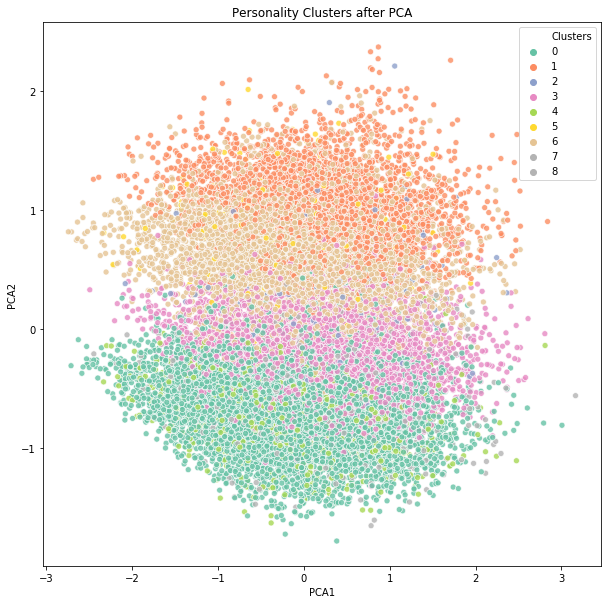

In [48]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2',legend='full', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [49]:
gmm = GaussianMixture(n_components=4)
labels = gmm.fit_predict(encoded_df)

In [52]:
df2['labels'] = labels

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(encoded_df)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = labels
df_pca.head()

,PCA1,PCA2,Clusters
0,-2.277832,0.958651,2
1,0.369969,-0.463517,0
2,0.269288,-0.665792,1
3,1.401363,-0.476133,1
4,-0.144948,-0.230575,1


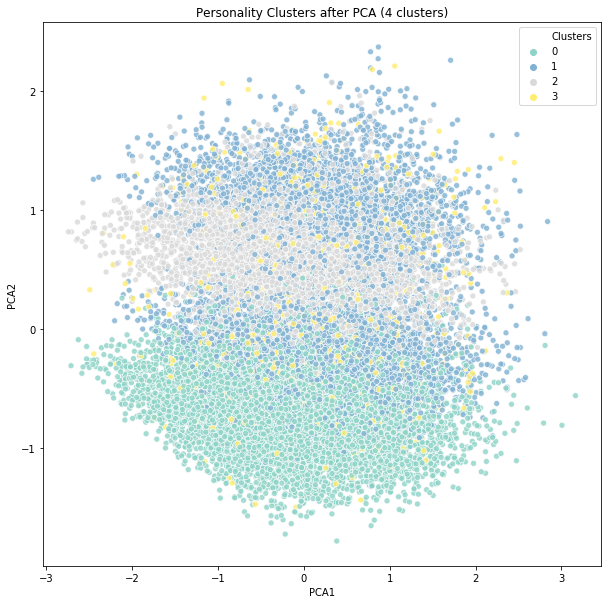

In [56]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2',legend='full', hue='Clusters', palette='Set3', alpha=0.8)
plt.title('Personality Clusters after PCA (4 clusters)');

In [62]:
encoded_df['labels'] = labels

In [64]:
encoded_df.groupby('labels').mean()

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,x0_False,x0_True,x1_Female,x1_Male,x1_Other,x2_Both,x2_Left,x2_Right
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.672110,0.298436,0.778669,0.272516,0.705164,0.201793,0.750785,0.551021,0.795621,0.742833,0.593730,0.513025,0.747676,0.413307,0.413830,0.477386,0.685757,0.336955,0.590359,0.657580,0.414550,0.393769,0.615656,0.510734,0.638500,0.318399,0.493586,0.611991,0.484618,0.638925,0.228237,0.768458,0.270782,0.803116,0.238513,0.758869,0.234193,0.746760,0.770683,0.682976,0.631660,0.524414,0.752553,0.407220,0.476764,0.519440,0.547388,0.451859,0.558876,0.454837,0.000000,1.000000,0.991360,0.000000,0.008640,0.001571,0.092290,0.906140
1,0.631976,0.309865,0.773658,0.287875,0.704352,0.202267,0.774757,0.494048,0.759857,0.729944,0.561647,0.477214,0.741356,0.423643,0.462390,0.487299,0.626024,0.406695,0.539013,0.658553,0.395739,0.470124,0.595466,0.561344,0.590006,0.405027,0.434486,0.559258,0.553496,0.657150,0.440855,0.711518,0.260161,0.750417,0.315021,0.727859,0.327305,0.649833,0.744882,0.678837,0.544207,0.549249,0.712087,0.470124,0.536435,0.528473,0.569419,0.501592,0.529497,0.484114,1.000000,0.000000,0.554443,0.440855,0.004701,0.000303,0.000607,0.999090
2,0.734040,0.234397,0.788590,0.237732,0.758576,0.194855,0.786505,0.631610,0.801513,0.793414,0.580872,0.495474,0.742258,0.396498,0.379407,0.478978,0.674309,0.369402,0.525191,0.658707,0.411982,0.472963,0.603442,0.549428,0.583552,0.371129,0.468259,0.616782,0.546629,0.645843,0.317592,0.703192,0.366484,0.694616,0.345224,0.661327,0.325631,0.661029,0.662101,0.635243,0.483564,0.634707,0.638221,0.443247,0.430562,0.402930,0.468020,0.362375,0.496784,0.422106,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.124345,0.875655
3,0.711141,0.266304,0.837500,0.253533,0.749185,0.153533,0.798913,0.612772,0.776087,0.789674,0.588315,0.481522,0.782065,0.432609,0.452446,0.470924,0.654891,0.392663,0.530163,0.682065,0.405978,0.455978,0.580978,0.552717,0.607880,0.396196,0.473098,0.590217,0.523098,0.645652,0.396196,0.711685,0.320652,0.727717,0.308967,0.690217,0.318207,0.679076,0.728804,0.670652,0.540761,0.568750,0.689402,0.454076,0.491576,0.474185,0.557609,0.486685,0.526630,0.473641,0.638043,0.361957,0.596739,0.403261,0.000000,0.484783,0.515217,0.000000


In [71]:
pd.concat([df[big5traits],encoded_df],axis=1).groupby('labels').mean()

,Extroversion,Agreeableness,Conscientiousness,Neuroticism,Open2Experience,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,x0_False,x0_True,x1_Female,x1_Male,x1_Other,x2_Both,x2_Left,x2_Right
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,20.692368,30.236549,23.793036,18.153031,28.893834,0.672110,0.298436,0.778669,0.272516,0.705164,0.201793,0.750785,0.551021,0.795621,0.742833,0.593730,0.513025,0.747676,0.413307,0.413830,0.477386,0.685757,0.336955,0.590359,0.657580,0.414550,0.393769,0.615656,0.510734,0.638500,0.318399,0.493586,0.611991,0.484618,0.638925,0.228237,0.768458,0.270782,0.803116,0.238513,0.758869,0.234193,0.746760,0.770683,0.682976,0.631660,0.524414,0.752553,0.407220,0.476764,0.519440,0.547388,0.451859,0.558876,0.454837,0.000000,1.000000,0.991360,0.000000,0.008640,0.001571,0.092290,0.906140
1,19.665150,27.680012,23.176524,18.454201,28.274340,0.631976,0.309865,0.773658,0.287875,0.704352,0.202267,0.774757,0.494048,0.759857,0.729944,0.561647,0.477214,0.741356,0.423643,0.462390,0.487299,0.626024,0.406695,0.539013,0.658553,0.395739,0.470124,0.595466,0.561344,0.590006,0.405027,0.434486,0.559258,0.553496,0.657150,0.440855,0.711518,0.260161,0.750417,0.315021,0.727859,0.327305,0.649833,0.744882,0.678837,0.544207,0.549249,0.712087,0.470124,0.536435,0.528473,0.569419,0.501592,0.529497,0.484114,1.000000,0.000000,0.554443,0.440855,0.004701,0.000303,0.000607,0.999090
2,19.830872,26.650310,23.281563,21.493568,30.509052,0.734040,0.234397,0.788590,0.237732,0.758576,0.194855,0.786505,0.631610,0.801513,0.793414,0.580872,0.495474,0.742258,0.396498,0.379407,0.478978,0.674309,0.369402,0.525191,0.658707,0.411982,0.472963,0.603442,0.549428,0.583552,0.371129,0.468259,0.616782,0.546629,0.645843,0.317592,0.703192,0.366484,0.694616,0.345224,0.661327,0.325631,0.661029,0.662101,0.635243,0.483564,0.634707,0.638221,0.443247,0.430562,0.402930,0.468020,0.362375,0.496784,0.422106,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.124345,0.875655
3,19.801087,27.456522,23.648913,19.129348,30.407609,0.711141,0.266304,0.837500,0.253533,0.749185,0.153533,0.798913,0.612772,0.776087,0.789674,0.588315,0.481522,0.782065,0.432609,0.452446,0.470924,0.654891,0.392663,0.530163,0.682065,0.405978,0.455978,0.580978,0.552717,0.607880,0.396196,0.473098,0.590217,0.523098,0.645652,0.396196,0.711685,0.320652,0.727717,0.308967,0.690217,0.318207,0.679076,0.728804,0.670652,0.540761,0.568750,0.689402,0.454076,0.491576,0.474185,0.557609,0.486685,0.526630,0.473641,0.638043,0.361957,0.596739,0.403261,0.000000,0.484783,0.515217,0.000000
